In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
file_path = "/content/drive/MyDrive/DatasetV1.csv"  # Replace with your CSV file path
# df = pd.read_csv(file_path)
df = pd.read_csv(file_path, encoding='unicode_escape')

In [ ]:
# DF modifications

# Convert 'DATE_OCC' to datetime
df['DATE_OCC'] = pd.to_datetime(df['DATE OCC'])

# Extract the year from the 'DATE_OCC' column
df['Year'] = df['DATE_OCC'].dt.year

# Ensure 'TIME OCC' is treated as a string, then extract the hour
df['TIME OCC'] = df['TIME OCC'].astype(str).str.zfill(4)  # Pad with zeros if needed, e.g., '1530' -> '1530'

# Extract the hour from the 'TIME OCC' column
df['Hour'] = df['TIME OCC'].str[:2].astype(int)

# Convert 'Date Rptd' to datetime
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])

# Extract day of the week (0=Monday, 6=Sunday)
df['Day_of_Week'] = df['Date Rptd'].dt.dayofweek

<ipython-input-45-6d758c82d501>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE_OCC'] = pd.to_datetime(df['DATE OCC'])


## Fig 1:
# Average Crime Count by Month and Crime Category

Insights:

1.   June is the month with the highest average crime rate
2.   We see the trend of a gradual increase from the beginning of the year and reaching the maximum during the summer months
3.   We seem to correlate this to the weather patterns as during the summer months we can expect more people to spend time outdoors which increase the chances of crime.





<ipython-input-46-1dd5210ae59b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Month'] = filtered_df['Date Rptd'].dt.month


<Figure size 1200x800 with 0 Axes>

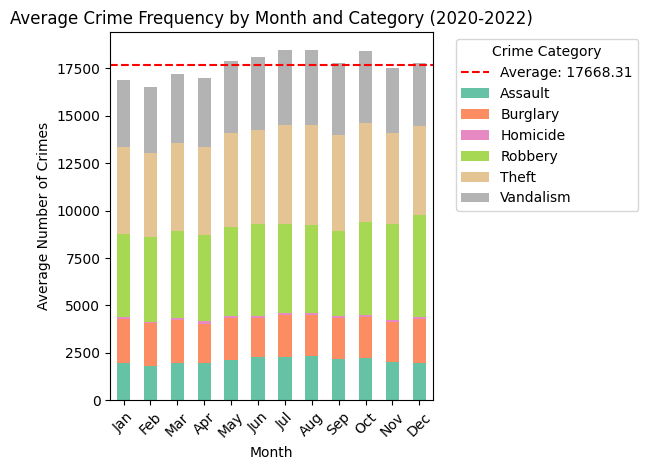

In [ ]:
# Filter data for years 2020 to 2022
filtered_df = df[(df['Date Rptd'].dt.year >= 2020) & (df['Date Rptd'].dt.year <= 2022)]

# Extract month from 'Date Rptd'
filtered_df['Month'] = filtered_df['Date Rptd'].dt.month

# Group by 'Month' and 'Crm_Category' to calculate average crimes per month
monthly_crime_category_avg = (
    filtered_df.groupby(['Month', 'Crm_Category']).size().unstack(fill_value=0) /
    filtered_df['Date Rptd'].dt.year.nunique()
)

# Calculate the overall average crimes across all months
average_crimes = monthly_crime_category_avg.sum(axis=1).mean()

# Plotting the stacked bar chart
plt.figure(figsize=(12, 8))
monthly_crime_category_avg.plot(kind='bar', stacked=True, colormap='Set2')

# Add average line
plt.axhline(average_crimes, color='red', linestyle='--', label=f'Average: {average_crimes:.2f}')

# Adding titles and labels
plt.title('Average Crime Frequency by Month and Category (2020-2022)')
plt.xlabel('Month')
plt.ylabel('Average Number of Crimes')
plt.xticks(
    ticks=range(12),
    labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    rotation=45
)
plt.legend(title='Crime Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot with the average line
plt.tight_layout()
plt.show()


## Fig 2:
# Total Crime by Year and Crime Category



1.   Crime in Los Angeles seems to be increasing at an average rate of 11.05% yoy.
2.   2020 was the year with the lowest crime rate as COVID measures might have prevented the amount of outdoor activity.
3.   There doesnt seem to be much of a change in the crime composition between the years



<ipython-input-47-8bf39a8afb6b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Year'] = filtered_df['Date Rptd'].dt.year


<Figure size 1200x800 with 0 Axes>

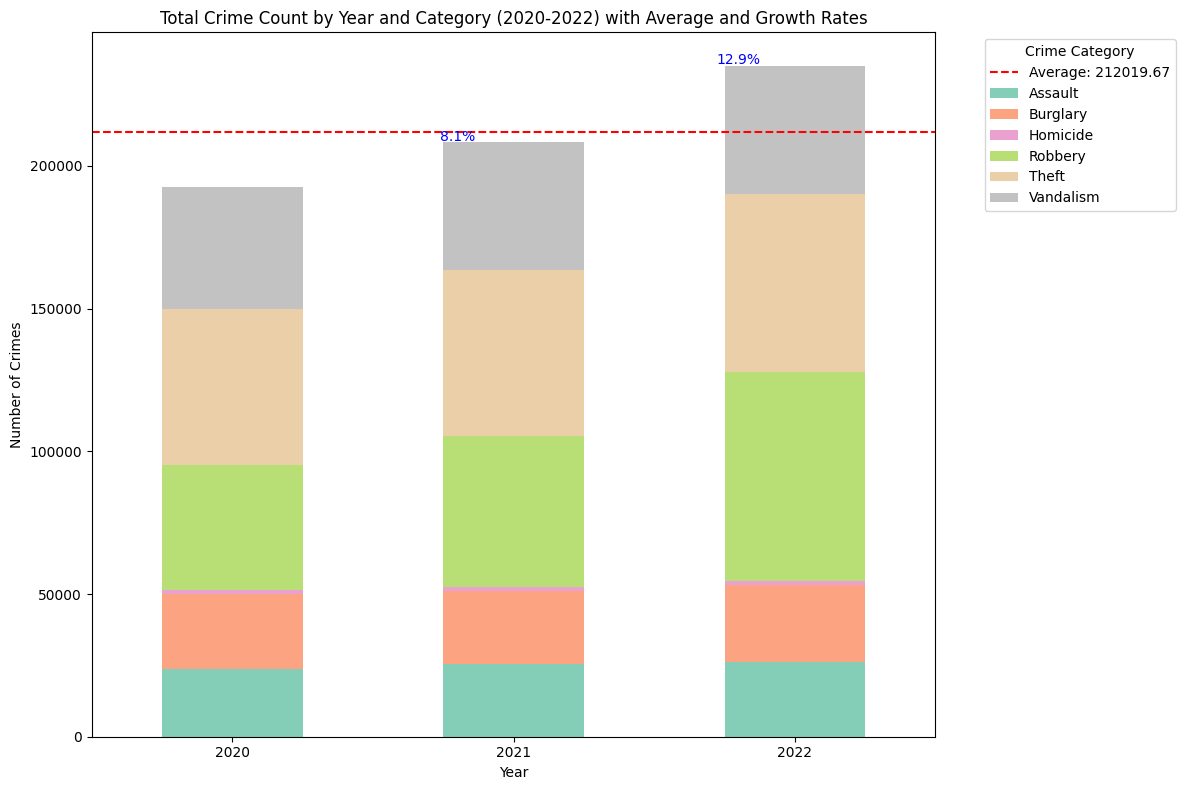

In [ ]:
import matplotlib.pyplot as plt

# Filter data for years 2020 to 2022
filtered_df = df[(df['Date Rptd'].dt.year >= 2020) & (df['Date Rptd'].dt.year <= 2022)]

# Extract year from 'Date Rptd'
filtered_df['Year'] = filtered_df['Date Rptd'].dt.year

# Group by 'Year' and 'Crm_Category' to count occurrences
yearly_crime_category_counts = filtered_df.groupby(['Year', 'Crm_Category']).size().unstack(fill_value=0)

# Calculate total crimes per year
total_crimes_per_year = yearly_crime_category_counts.sum(axis=1)

# Calculate the average crime count across the years
average_crimes = total_crimes_per_year.mean()

# Calculate the growth rate (percent change year-over-year)
growth_rate = total_crimes_per_year.pct_change().fillna(0) * 100

# Plotting the stacked bar chart
plt.figure(figsize=(12, 8))
bars = yearly_crime_category_counts.plot(kind='bar', stacked=True, colormap='Set2', figsize=(12, 8), alpha=0.8)

# Add the average line
plt.axhline(average_crimes, color='red', linestyle='--', label=f'Average: {average_crimes:.2f}')

# Overlay the growth line
for i, year in enumerate(total_crimes_per_year.index):
    if i > 0:  # Skip the first year as it has no growth rate
        x = i - 0.2  # Adjust x to align with bars
        plt.text(x, total_crimes_per_year[year] + 500, f'{growth_rate[year]:.1f}%', color='blue', fontsize=10, ha='center')

# Adding titles and labels
plt.title('Total Crime Count by Year and Category (2020-2022) with Average and Growth Rates')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(range(len(total_crimes_per_year.index)), total_crimes_per_year.index, rotation=0)
plt.legend(title='Crime Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

## Fig 3:
# Victim Age distribution by Crime Category

3. Crimes such as Vandalism, Robbery and Assault seem to have a higher victim average age as compared to Theft, Homicide and Burglary. Potential reasons being:


*     Theft and burglary tend to disproportionately affect lower-income and younger populations who may be more prone to opportunistic crimes, such as taking advantage of unattended property or entering empty homes.

*     Robbery can disproportionately affect people who hold higher-value items, often linked to adults with more financial stability and material assets.


<ipython-input-50-a93ab65d6874>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Crm_Category', y='Vict Age', palette='coolwarm')


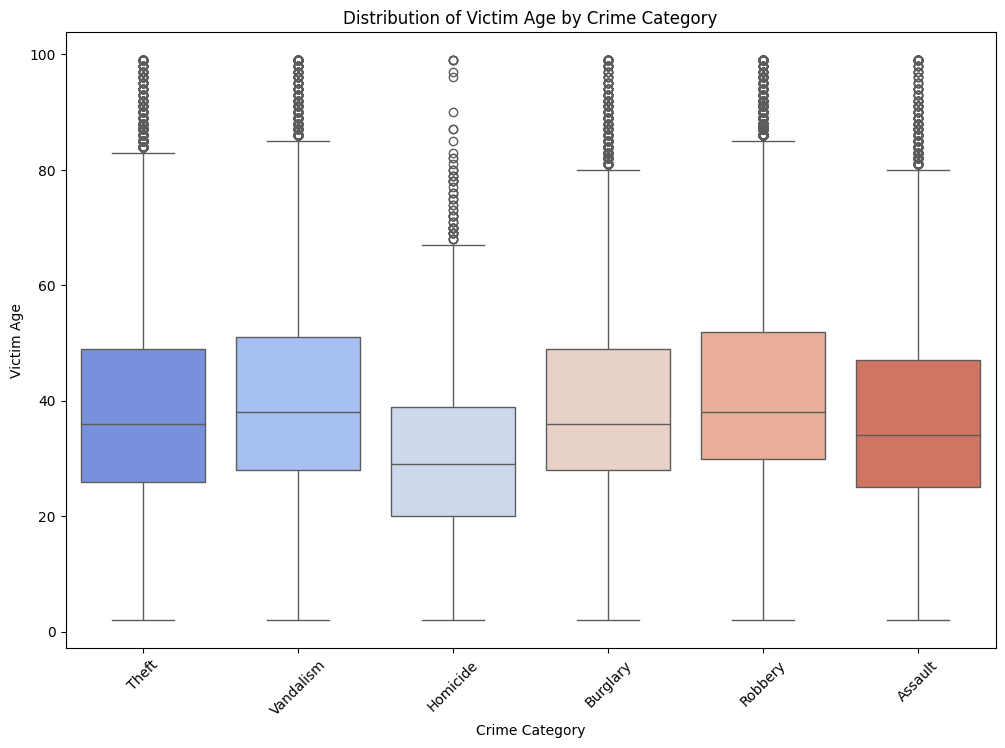

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='Crm_Category', y='Vict Age', palette='coolwarm')
plt.title('Distribution of Victim Age by Crime Category')
plt.xlabel('Crime Category')
plt.ylabel('Victim Age')
plt.xticks(rotation=45)
plt.show()

## Fig 4:
# Crime Category Distribution by Area Name

1. High Crime Concentrations:

Central, Southeast, and Pacific areas show significantly higher numbers of crimes in categories like robbery and theft, as indicated by darker shades of blue.
77th Street leads in assault cases, with a notably high count compared to other areas.

2. Burglary Trends:

Central and Southwest areas have elevated burglary frequencies, suggesting these regions may require additional focus on residential or commercial security.

3. Homicide Patterns:

Homicides are less frequent across all regions, but the highest counts appear in areas like Southeast and Southwest, requiring targeted interventions.

4. Vandalism:

Vandalism incidents are high in 77th Street, Southeast, and Central areas, indicating the need for preventive measures, possibly through community programs or increased surveillance.

5. Balanced Crime Distribution:

Some areas, such as Hollywood and West LA, have a relatively balanced distribution across different crime categories, showing no significant outlier in any single crime type.

6. Relatively Safer Areas:

Areas like West Valley and Foothill report lower crime counts overall across most categories, suggesting these may be relatively safer regions.

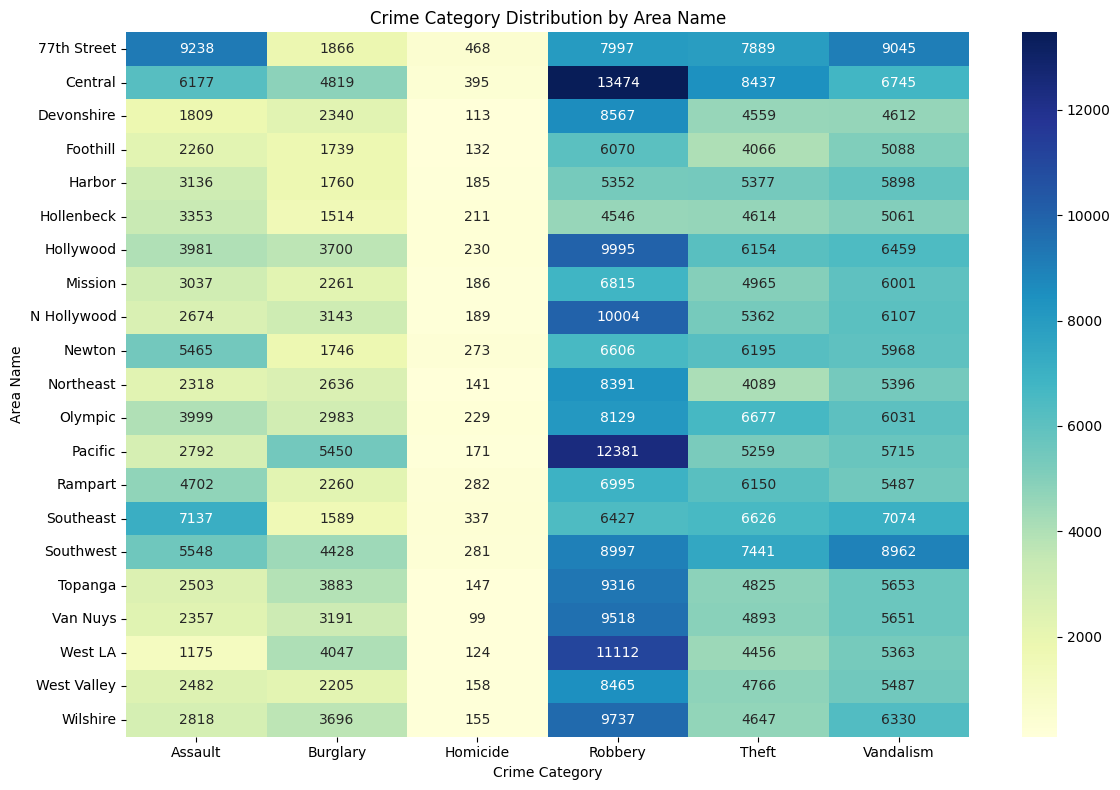

In [ ]:
# Create a pivot table for crime category distribution by area
crime_heatmap_data = df.groupby(['AREA NAME', 'Crm_Category']).size().unstack(fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(crime_heatmap_data, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Crime Category Distribution by Area Name')
plt.xlabel('Crime Category')
plt.ylabel('Area Name')
plt.tight_layout()
plt.show()